# <b> AutoMobile Dataset Analysis & Price Prediction <b>

## Table Of Content:  <a id="index"></a>
* [Problem Statement](#problemstatement)
* [Understanding Dataset](#understandingdataset)
* [Features/labels](#features)
* [Data Import & Analysis](#dataimport)
* [Exporatary Data Analysis](#eda)
* [Feature Engineering](#fe)
* [Data Preprocessing](#pp)
* [Machine Learning](#ml)
* [Result Analysis](#ra)


## Problem Statement <a class="anchor" id="problemstatement"></a>
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Understanding Dataset <a class="anchor" id="understandingdataset"></a>
This data set consists of three types of entities: <br>
(a) the specification of an auto in terms of various characteristics.<br> 
(b) its assigned insurance risk rating<br>
(c) its normalized losses in use as compared to other cars.<br>
The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. 
Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

### Features / Labels in Dataset <a id="features"></a>
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:<br>
        alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot, plymouth, porsche,renault, saab, subaru,toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

###### Its requested to try to code yourself and don't use google for coding as much as possible.

### Importing Basic Libraries & Dataset <a id="importdata"></a>

In [357]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [358]:
df = pd.read_csv('AutoData.csv')

In [359]:
df.head(5)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
make                205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

Total Null values: 0


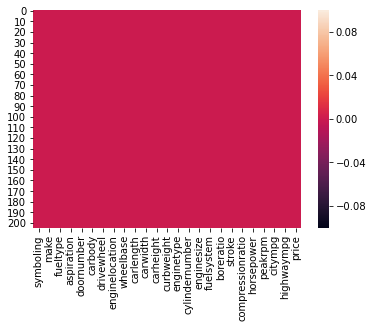

In [361]:
sns.heatmap(df.isnull())
print('Total Null values:',df.isnull().sum().sum())

###### No Null values

### EDA -- Exploratory Data Analysis  <a id="eda"></a>

Text(0.5, 1.0, 'Corelation Heatmap of Features')

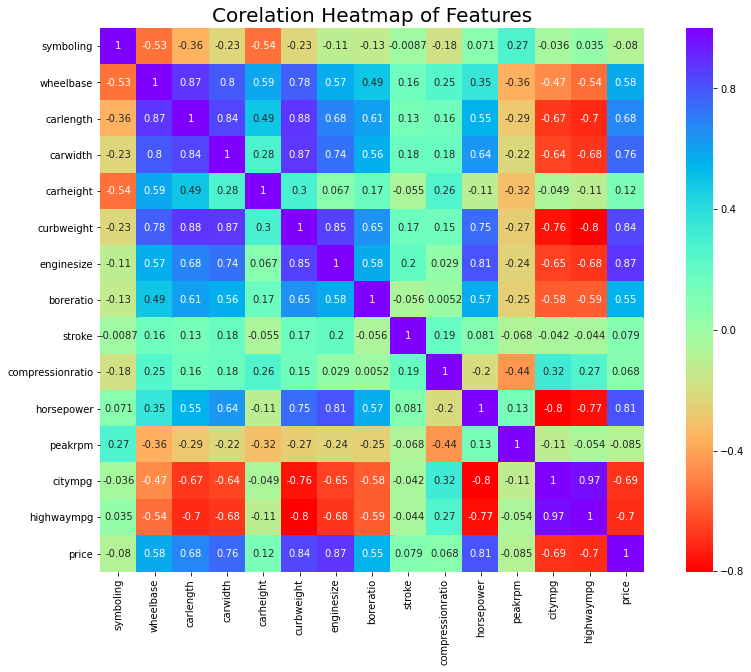

In [362]:
plt.subplots(figsize=(15,10))
sns_plot = sns.heatmap(df.corr(),annot =True,cmap='rainbow_r',square=True)
plt.title('Corelation Heatmap of Features',size=20)

### What is corelation and why we find it?
##### Corelation signifies how strong or weak the one variable is dependent on other variable

##### lets see the distribution of Price in dataset 

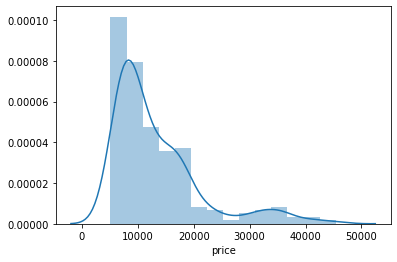

In [363]:
sns.distplot(df.price)

### lets start with Categorical Columns

In [364]:
### identigyind categorical and numerical columns
cols = df.columns
num_cols= df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [365]:
df[cat_cols]

,aspiration,cylindernumber,make,fueltype,enginelocation,fuelsystem,enginetype,doornumber,carbody,drivewheel
0,std,four,alfa-romero giulia,gas,front,mpfi,dohc,two,convertible,rwd
1,std,four,alfa-romero stelvio,gas,front,mpfi,dohc,two,convertible,rwd
2,std,six,alfa-romero Quadrifoglio,gas,front,mpfi,ohcv,two,hatchback,rwd
3,std,four,audi 100 ls,gas,front,mpfi,ohc,four,sedan,fwd
4,std,five,audi 100ls,gas,front,mpfi,ohc,four,sedan,4wd
...,...,...,...,...,...,...,...,...,...,...
200,std,four,volvo 145e (sw),gas,front,mpfi,ohc,four,sedan,rwd
201,turbo,four,volvo 144ea,gas,front,mpfi,ohc,four,sedan,rwd
202,std,six,volvo 244dl,gas,front,mpfi,ohcv,four,sedan,rwd
203,turbo,six,volvo 246,diesel,front,idi,ohc,four,sedan,rwd


In [366]:
df['make'] = df['make'].apply(lambda x : x.split(' ')[0].lower())
print('List of Companiesa:')
df['make'].value_counts()

List of Companiesa:


toyota         31
nissan         18
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
vw              2
maxda           2
vokswagen       1
porcshce        1
mercury         1
toyouta         1
Name: make, dtype: int64

###### we see many duplicate names and mis-speled names so we replace them

In [367]:
df.make.replace('toyouta','toyota',inplace=True)
df.make.replace('porcshce','porsche',inplace=True)
df.make.replace('maxda','mazda',inplace=True)
df.make.replace('vokswagen','volkswagen',inplace=True)
df.make.replace('vw','volkswagen',inplace=True)

Text(0.5, 1.0, 'Company & Price Comparision')

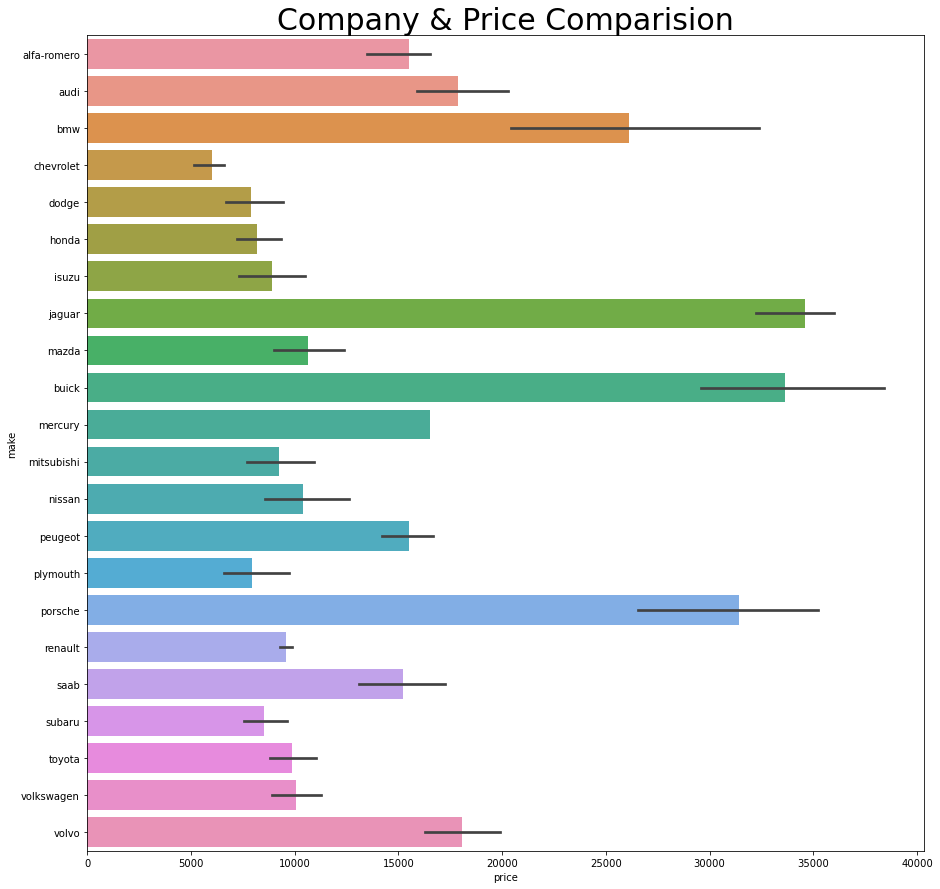

In [368]:
plt.figure(figsize=(15,15))
sns.barplot(df.price,df.make)
plt.title('Company & Price Comparision',size=30)

Text(0.5, 1.0, 'Which fuel type is more Expensive ?')

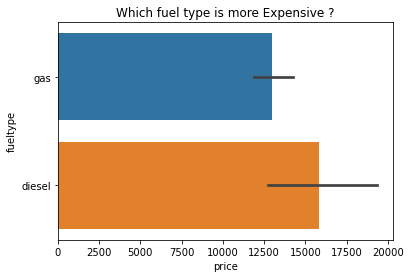

In [369]:
sns.barplot(df.price,df.fueltype)
plt.title('Which fuel type is more Expensive ?')

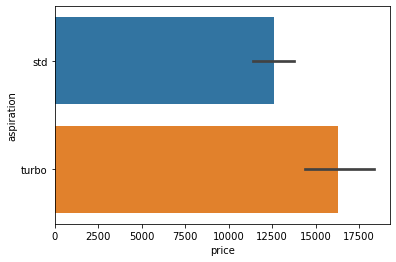

In [370]:
## aspiration is car engine type.
sns.barplot(df.price,df.aspiration)

Text(0.5, 1.0, 'We see a huge difference in Price when we see Engine location')

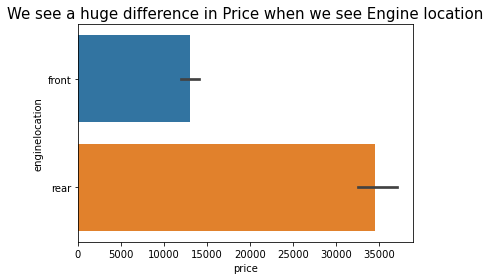

In [371]:
sns.barplot(df.price,df.enginelocation)
plt.title("We see a huge difference in Price when we see Engine location",size=15)

Text(0.5, 1.0, 'Car body types too have impact on price')

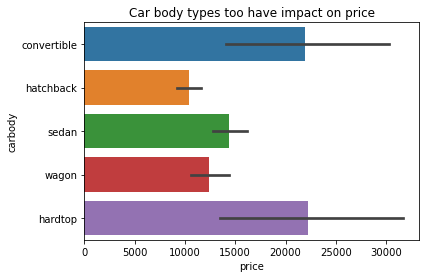

In [372]:
sns.barplot(df.price,df.carbody)
plt.title('Car body types too have impact on price')

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


Text(0.5, 1.0, 'Cars drivewheel too have impact on price')

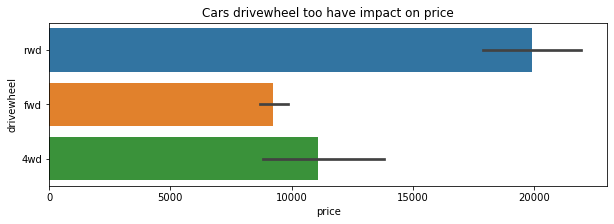

In [373]:
## fwd >> front wheel drive
## rwd >> rear wheel drive 
## 4wd >> 4 wheel drive (all wheels drive)
plt.figure(figsize=(10,3))
print(df.drivewheel.value_counts())
sns.barplot(df.price,df.drivewheel)
plt.title('Cars drivewheel too have impact on price')

Text(0.5, 1.0, 'Engine Type & Price Comparision')

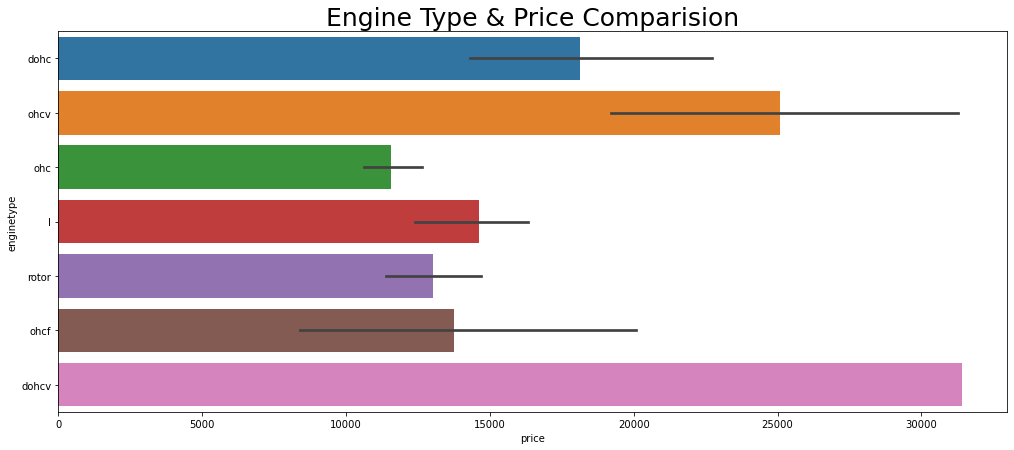

In [374]:
plt.figure(figsize=(17,7))
sns.barplot(df.price,df.enginetype)
plt.title('Engine Type & Price Comparision',size=25)

Text(0.5, 1.0, 'Fuel System & Price Comparision')

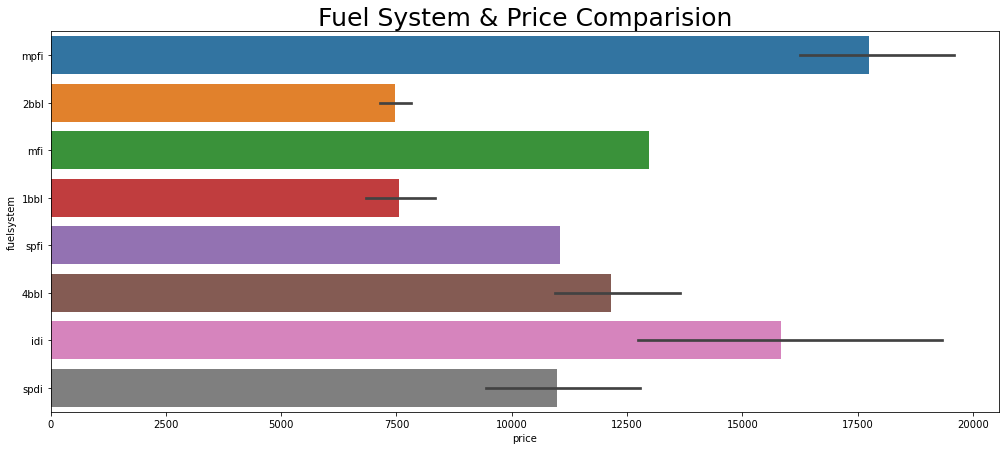

In [375]:
plt.figure(figsize=(17,7))
sns.barplot(df.price,df.fuelsystem)
plt.title('Fuel System & Price Comparision',size=25)

Text(0.5, 1.0, 'Cylinder number & Price Comparision')

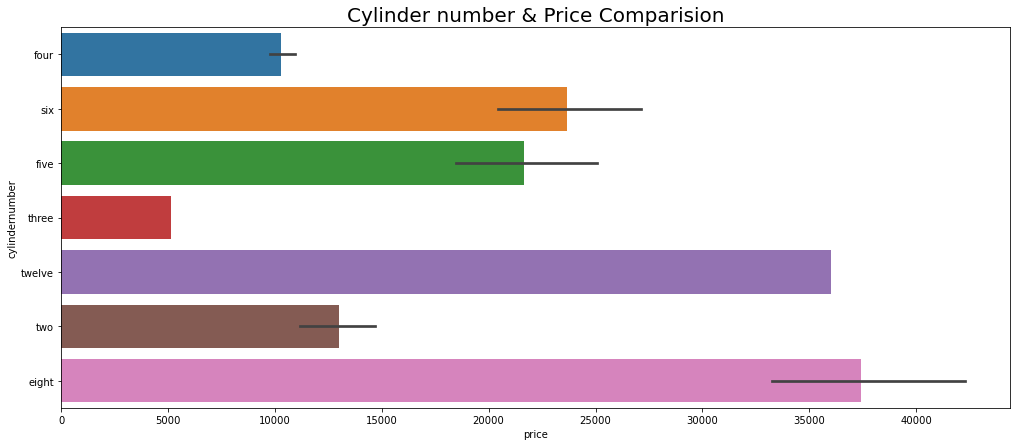

In [376]:
plt.figure(figsize=(17,7))
sns.barplot(df.price,df.cylindernumber)
plt.title('Cylinder number & Price Comparision',size=20)

Text(0.5, 1.0, 'No effect of No of doors on price')

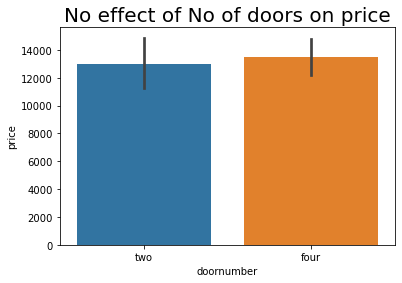

In [377]:
sns.barplot(df.doornumber,df.price)
plt.title('No effect of No of doors on price',size=20)

### lets do Numerical Columns

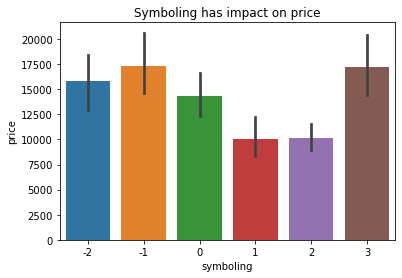

In [378]:
plt.title('Symboling has impact on price')
sns.barplot(df.symboling,df.price)

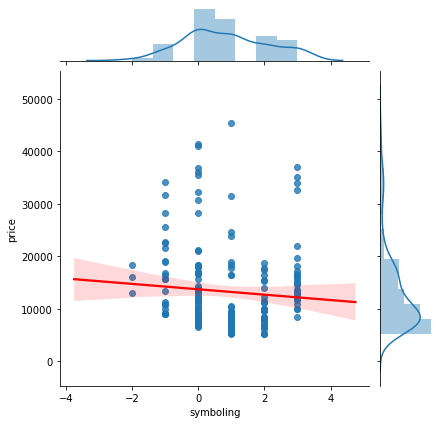

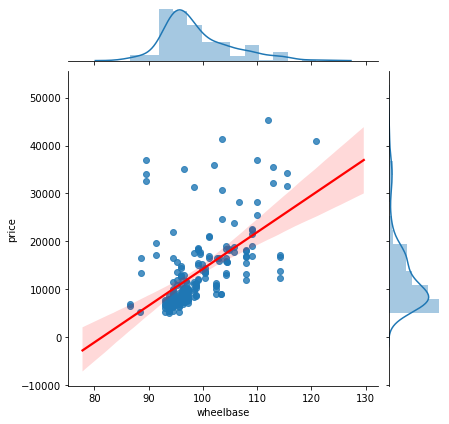

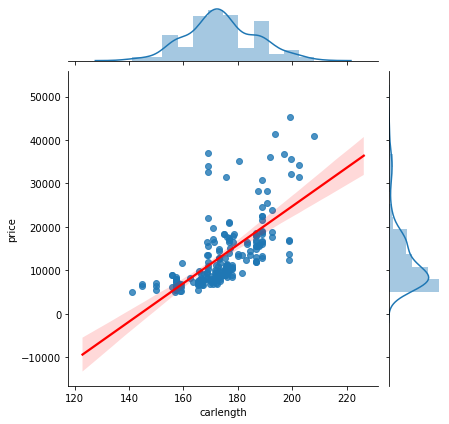

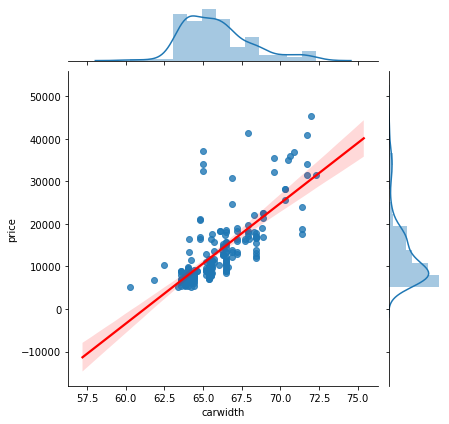

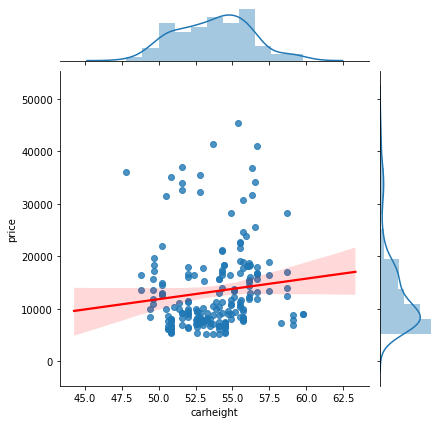

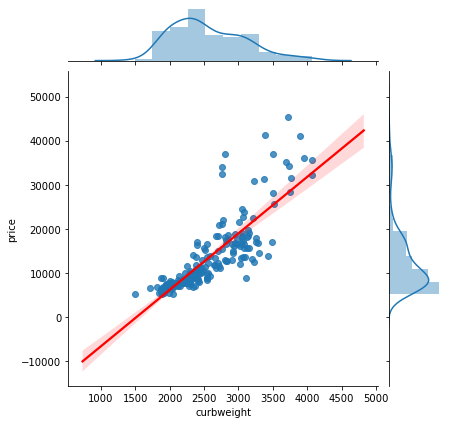

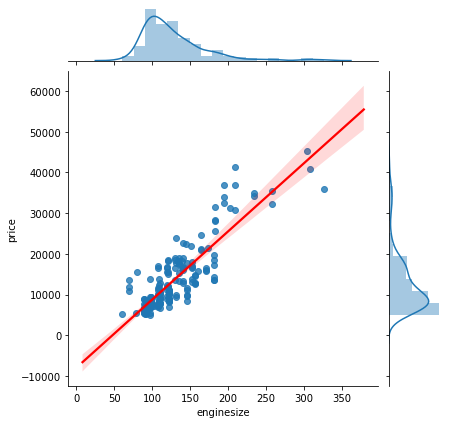

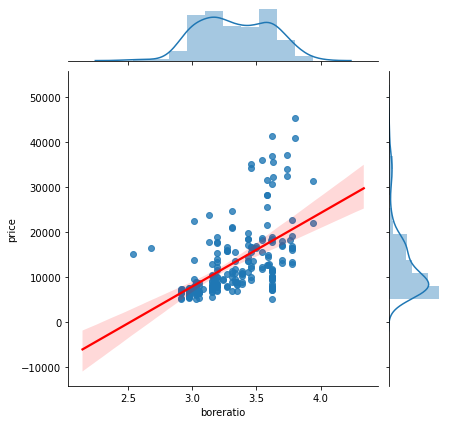

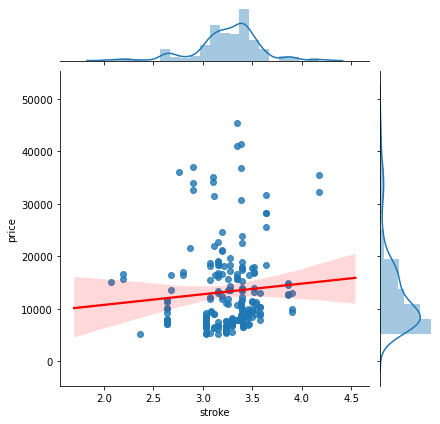

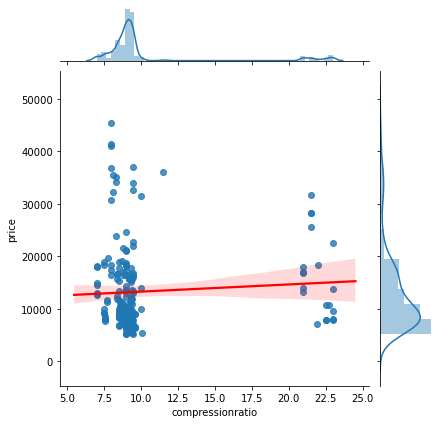

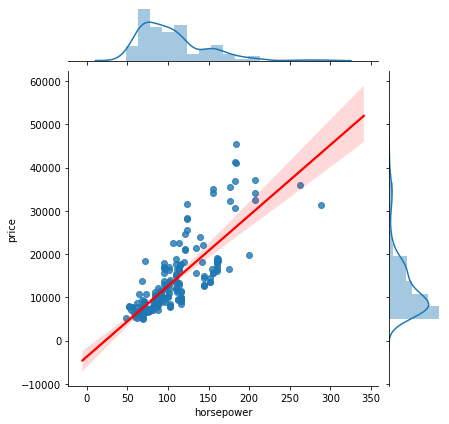

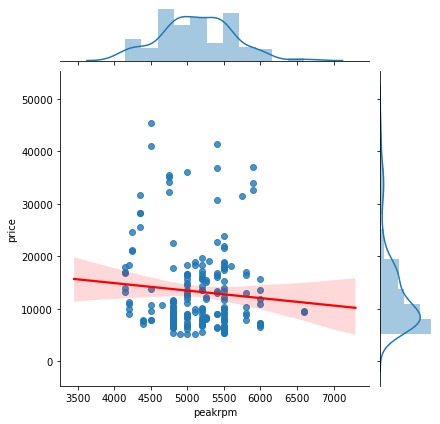

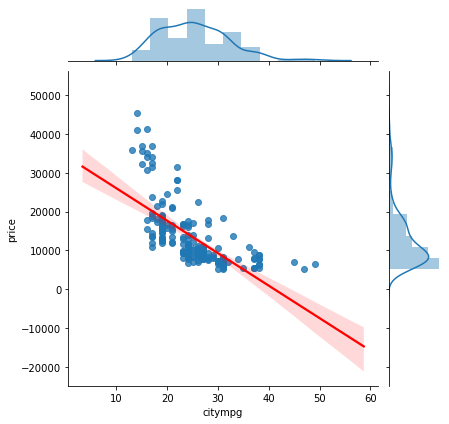

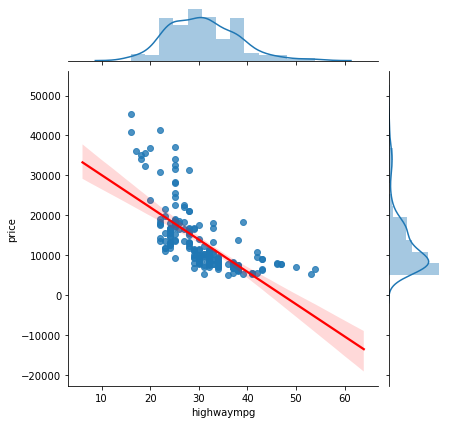

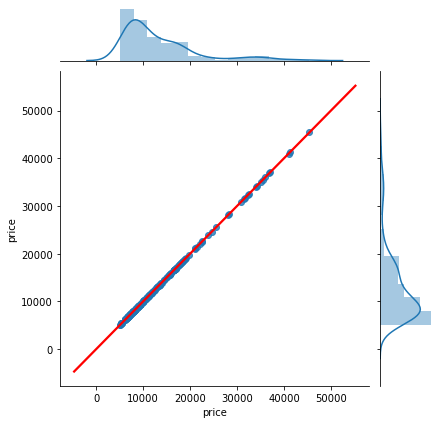

In [380]:
for i in df[num_cols]:
    sns.jointplot(df[i],df.price,kind='reg',
                 joint_kws={'line_kws':{'color':'red'}})
    plt.show()

## Feature Engineering  <a id="fe"></a>

In [381]:
### Converting Length, Height, width into sing area using area of rectangular cube
area = []
for (l,w,h) in zip(df.carlength,df.carwidth,df.carheight):
    area.append((2*l*w)+(2*h*l)+(2*h*w))

df['carArea'] = area

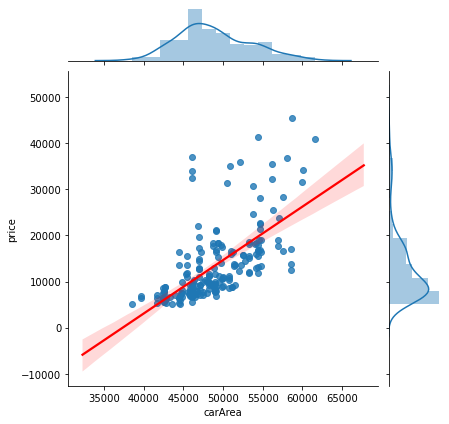

In [382]:
sns.jointplot(df['carArea'],df.price,kind='reg',
                 joint_kws={'line_kws':{'color':'red'}})

<hr>

In [383]:
## Converting Highway MPG & City MPG to AvgMPG
avgmpg = []
for (i,j) in zip(df.citympg,df.highwaympg):
    avgmpg.append((i+j)/2)

df['AvgMPG'] = avgmpg

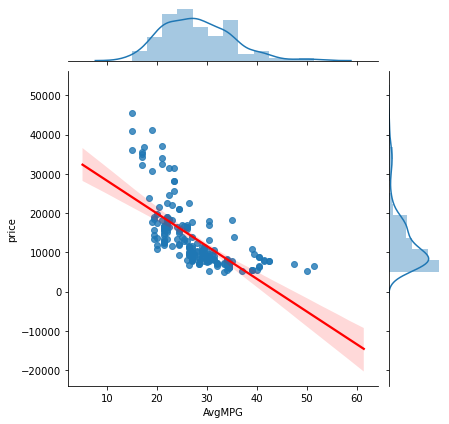

In [384]:
sns.jointplot(df['AvgMPG'],df.price,kind='reg',
                 joint_kws={'line_kws':{'color':'red'}})

In [385]:
df

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carArea,AvgMPG
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,44371.20,24.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,44371.20,24.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,47233.36,22.5
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,49749.92,27.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,49842.28,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845.0,54621.34,25.5
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,54572.48,22.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485.0,54621.34,20.5
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470.0,54621.34,26.5


## Data PreProcessing  <a id="pp"></a>

In [386]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carArea', 'AvgMPG'],
      dtype='object')

In [387]:
df1 = df.drop({'carlength','carwidth','doornumber','carheight','citympg','highwaympg'},axis=1)

In [388]:
df1.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'carArea',
       'AvgMPG'],
      dtype='object')

In [389]:
df1

,symboling,make,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carArea,AvgMPG
0,3,alfa-romero,gas,std,convertible,rwd,front,88.6,2548,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,44371.20,24.0
1,3,alfa-romero,gas,std,convertible,rwd,front,88.6,2548,dohc,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,44371.20,24.0
2,1,alfa-romero,gas,std,hatchback,rwd,front,94.5,2823,ohcv,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,47233.36,22.5
3,2,audi,gas,std,sedan,fwd,front,99.8,2337,ohc,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,49749.92,27.0
4,2,audi,gas,std,sedan,4wd,front,99.4,2824,ohc,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,49842.28,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,sedan,rwd,front,109.1,2952,ohc,...,141,mpfi,3.78,3.15,9.5,114,5400,16845.0,54621.34,25.5
201,-1,volvo,gas,turbo,sedan,rwd,front,109.1,3049,ohc,...,141,mpfi,3.78,3.15,8.7,160,5300,19045.0,54572.48,22.0
202,-1,volvo,gas,std,sedan,rwd,front,109.1,3012,ohcv,...,173,mpfi,3.58,2.87,8.8,134,5500,21485.0,54621.34,20.5
203,-1,volvo,diesel,turbo,sedan,rwd,front,109.1,3217,ohc,...,145,idi,3.01,3.40,23.0,106,4800,22470.0,54621.34,26.5


In [390]:
## Label Encoding categorical variables
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df1['fueltype']= label_encoder.fit_transform(df['fueltype'])
df1['make']= label_encoder.fit_transform(df['make']) 
df1['aspiration']= label_encoder.fit_transform(df['aspiration']) 
df1['carbody']= label_encoder.fit_transform(df['carbody']) 
df1['drivewheel']= label_encoder.fit_transform(df['drivewheel']) 
df1['enginelocation']= label_encoder.fit_transform(df['enginelocation']) 
df1['enginetype']= label_encoder.fit_transform(df['enginetype']) 
df1['fuelsystem']= label_encoder.fit_transform(df['fuelsystem']) 

In [391]:
df1

,symboling,make,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carArea,AvgMPG
0,3,0,1,0,0,2,0,88.6,2548,0,...,130,5,3.47,2.68,9.0,111,5000,13495.0,44371.20,24.0
1,3,0,1,0,0,2,0,88.6,2548,0,...,130,5,3.47,2.68,9.0,111,5000,16500.0,44371.20,24.0
2,1,0,1,0,2,2,0,94.5,2823,5,...,152,5,2.68,3.47,9.0,154,5000,16500.0,47233.36,22.5
3,2,1,1,0,3,1,0,99.8,2337,3,...,109,5,3.19,3.40,10.0,102,5500,13950.0,49749.92,27.0
4,2,1,1,0,3,0,0,99.4,2824,3,...,136,5,3.19,3.40,8.0,115,5500,17450.0,49842.28,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,21,1,0,3,2,0,109.1,2952,3,...,141,5,3.78,3.15,9.5,114,5400,16845.0,54621.34,25.5
201,-1,21,1,1,3,2,0,109.1,3049,3,...,141,5,3.78,3.15,8.7,160,5300,19045.0,54572.48,22.0
202,-1,21,1,0,3,2,0,109.1,3012,5,...,173,5,3.58,2.87,8.8,134,5500,21485.0,54621.34,20.5
203,-1,21,0,1,3,2,0,109.1,3217,3,...,145,3,3.01,3.40,23.0,106,4800,22470.0,54621.34,26.5


In [392]:
from word2number import w2n

In [393]:
nums = []
for i in df1['cylindernumber']:
    x = w2n.word_to_num(i)
    nums.append(x)
df1['cylindernumber'] = nums

In [394]:
df1

,symboling,make,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,carArea,AvgMPG
0,3,0,1,0,0,2,0,88.6,2548,0,...,130,5,3.47,2.68,9.0,111,5000,13495.0,44371.20,24.0
1,3,0,1,0,0,2,0,88.6,2548,0,...,130,5,3.47,2.68,9.0,111,5000,16500.0,44371.20,24.0
2,1,0,1,0,2,2,0,94.5,2823,5,...,152,5,2.68,3.47,9.0,154,5000,16500.0,47233.36,22.5
3,2,1,1,0,3,1,0,99.8,2337,3,...,109,5,3.19,3.40,10.0,102,5500,13950.0,49749.92,27.0
4,2,1,1,0,3,0,0,99.4,2824,3,...,136,5,3.19,3.40,8.0,115,5500,17450.0,49842.28,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,21,1,0,3,2,0,109.1,2952,3,...,141,5,3.78,3.15,9.5,114,5400,16845.0,54621.34,25.5
201,-1,21,1,1,3,2,0,109.1,3049,3,...,141,5,3.78,3.15,8.7,160,5300,19045.0,54572.48,22.0
202,-1,21,1,0,3,2,0,109.1,3012,5,...,173,5,3.58,2.87,8.8,134,5500,21485.0,54621.34,20.5
203,-1,21,0,1,3,2,0,109.1,3217,3,...,145,3,3.01,3.40,23.0,106,4800,22470.0,54621.34,26.5


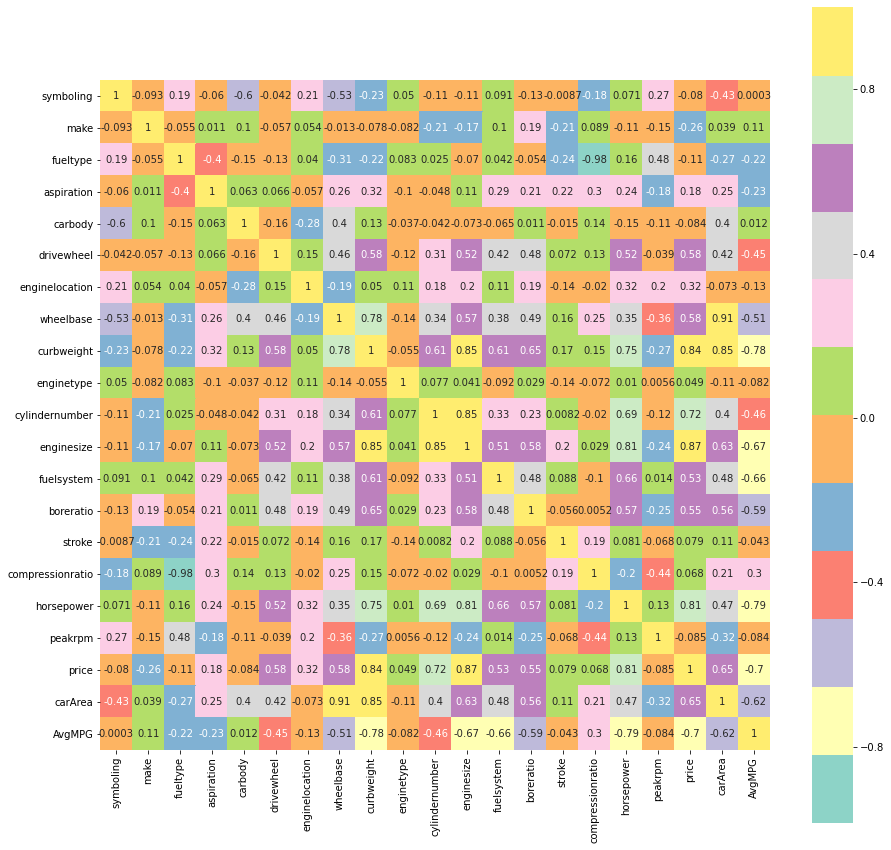

In [395]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),square=True,annot=True,cmap='Set3')

In [396]:
highcorelation = ['curbweight','boreratio','wheelbase']

In [397]:
df1.drop(highcorelation,axis=1,inplace=True)

## <b>Machine learning Model Building<b>  <a id="ml"></a>

In [398]:
## Importing Common Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.api as sm

### Linear Regression

In [399]:
from sklearn.linear_model import LinearRegression

#### Using Linear Regression With Each Single Feature

In [400]:
for i in df1.columns:
    X = df1[[i]]
    y = df1[['price']]
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)
    LR = LinearRegression()
    LR.fit(X_train,y_train)
    y_pred = LR.predict(X_test)
    print('R2 Score with',i,'>>',r2_score(y_pred,y_test))

R2 Score with symboling >> -593.015838951539
R2 Score with make >> -23.657757595561943
R2 Score with fueltype >> -285.7202168735213
R2 Score with aspiration >> -54.14749666637962
R2 Score with carbody >> -107.5099138780915
R2 Score with drivewheel >> -1.0596713611639004
R2 Score with enginelocation >> -8.36080131819834
R2 Score with enginetype >> -3934.507766953165
R2 Score with cylindernumber >> -0.638868249068052
R2 Score with enginesize >> 0.6494959241072555
R2 Score with fuelsystem >> -2.228262970979461
R2 Score with stroke >> -636.6028455605991
R2 Score with compressionratio >> -1031.5518883768405
R2 Score with horsepower >> 0.2797961850633667
R2 Score with peakrpm >> -115.25431258806222
R2 Score with price >> 1.0
R2 Score with carArea >> -0.5617772458592101
R2 Score with AvgMPG >> 0.15908727042121273


### Using Linear Regression With All Features

In [401]:
X = df1.drop('price',axis=1)
y = df1[['price']]

In [402]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [403]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [404]:
print('Coefficient is',LR.coef_[0][0])
print('intercept is',LR.intercept_[0])

Coefficient is -128.07049765015498
intercept is -44255.74209656773


In [405]:
y_pred = LR.predict(X_test)
print("R2 Score",r2_score(y_pred,y_test))

R2 Score 0.845010934040597


<hr>

### Based on OLS REPORT

In [406]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              367.7
Date:                Tue, 18 Feb 2020   Prob (F-statistic):                   2.76e-134
Time:                        00:38:59   Log-Likelihood:                         -1906.4
No. Observations:                 205   AIC:                                      3847.
Df Residuals:                     188   BIC:                                      3903.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [407]:
OLS =['make','carbody','enginelocation','enginesize',
      'stroke','horsepower','carArea'] #'boreratio'

In [408]:
X = df1[OLS]
y = df1[['price']]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print('R2 Score with',i,'>>',r2_score(y_pred,y_test))

R2 Score with AvgMPG >> 0.8308805976201942


<hr>

### RFE selected Feature

In [409]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [410]:
X = df1.drop('price',axis=1)
y = df1['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [411]:
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)

In [412]:
model = LinearRegression()
rfe = RFE(model, 8)

In [413]:
rfe = RFE(model, 8)

In [414]:
rfe.fit(X_train,y_train)
X_train.columns[rfe.support_]

Index(['symboling', 'fueltype', 'carbody', 'drivewheel', 'enginelocation',
       'cylindernumber', 'compressionratio', 'AvgMPG'],
      dtype='object')

In [415]:
X.columns[rfe.support_]

Index(['symboling', 'fueltype', 'carbody', 'drivewheel', 'enginelocation',
       'cylindernumber', 'compressionratio', 'AvgMPG'],
      dtype='object')

In [416]:
X = df1[X_train.columns[rfe.support_]]
y = df1[['price']]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred1 = LR.predict(X_test)
print("R2 score is",r2_score(y_pred,y_test))

R2 score is 0.8308805976201942


<hr><hr>

## Random Forest Regressor

In [417]:
from sklearn.ensemble import RandomForestRegressor

In [418]:
X=df1.drop('price',axis=1)
y=df1[['price']]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)
rf = RandomForestRegressor(n_estimators=50,random_state=101)

In [419]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=101, verbose=0,
                      warm_start=False)

In [420]:
y_pred_rf = rf.predict(X_test)

In [421]:
print("R2 score is",r2_score(y_pred_rf,y_test))

R2 score is 0.9332168686634389


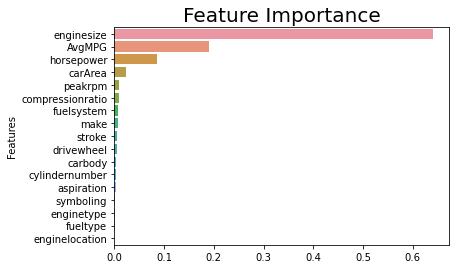

In [422]:
importances=rf.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:20], y=feature_importances.index[0:20])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

## Using OLS WITH Random Forest

In [423]:
X=df1[OLS]
y=df1[['price']]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)
rf = RandomForestRegressor(n_estimators=50,random_state=101)

In [424]:
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print("R2 score is",r2_score(y_pred_rf,y_test))

R2 score is 0.93642124881353


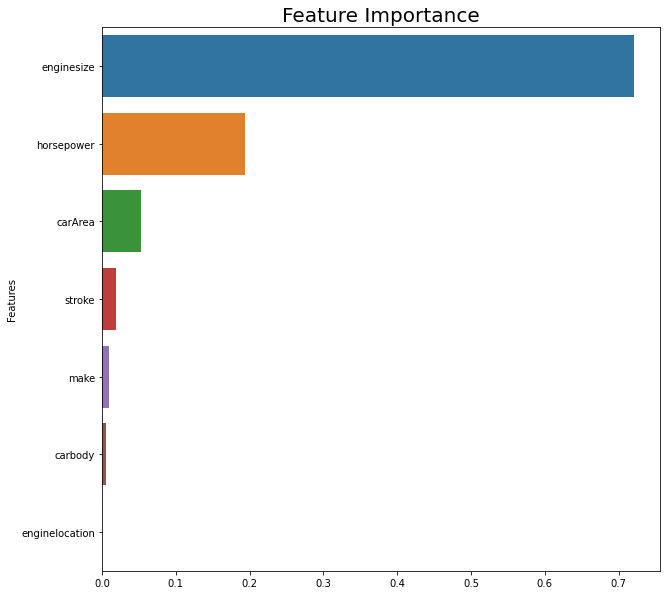

In [425]:
importances=rf.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=feature_importances[0:7], y=feature_importances.index[0:7])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

## <b>Result Analysis<b>  <a id="ra"></a>

### Based on OLS based Random Forest Result

### Seeing the Standard Deviation of The The Result

In [426]:
scaler = MinMaxScaler()
y_test1 = scaler.fit_transform(y_test)
y_pred1 = scaler.fit_transform(y_pred.reshape(-1, 1))

Text(0.5, 1.0, 'Error Terms')

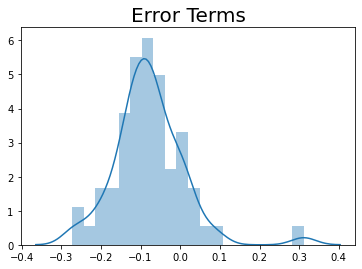

In [427]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test1 - y_pred1), bins = 20)
plt.title('Error Terms',size= 20)                  # Plot heading  

Text(0.5, 1.0, 'Red > Predicted and Green > Acutal Points')

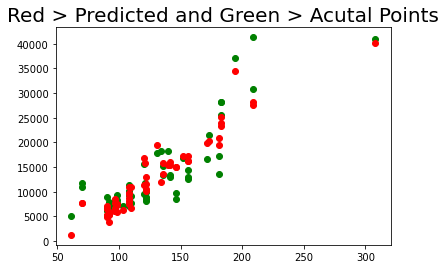

In [428]:
plt.scatter(X_test['enginesize'],y_test,color='green')
plt.scatter(X_test['enginesize'],y_pred,color='red')
plt.title('Red > Predicted and Green > Acutal Points',size=20)

Text(0.5, 1.0, 'Red > Predicted and Green > Acutal Points')

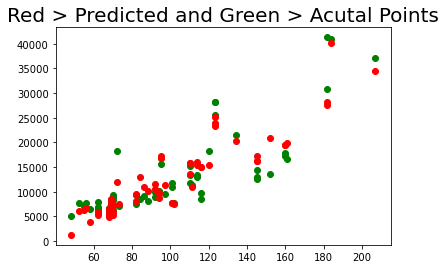

In [429]:
plt.scatter(X_test['horsepower'],y_test,color='green')
plt.scatter(X_test['horsepower'],y_pred,color='red')
plt.title('Red > Predicted and Green > Acutal Points',size=20)

## <b>Conculsion:</b>

## Thank you 
#####  [ Back to Index](#index)